In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
import matplotlib.pyplot as plt

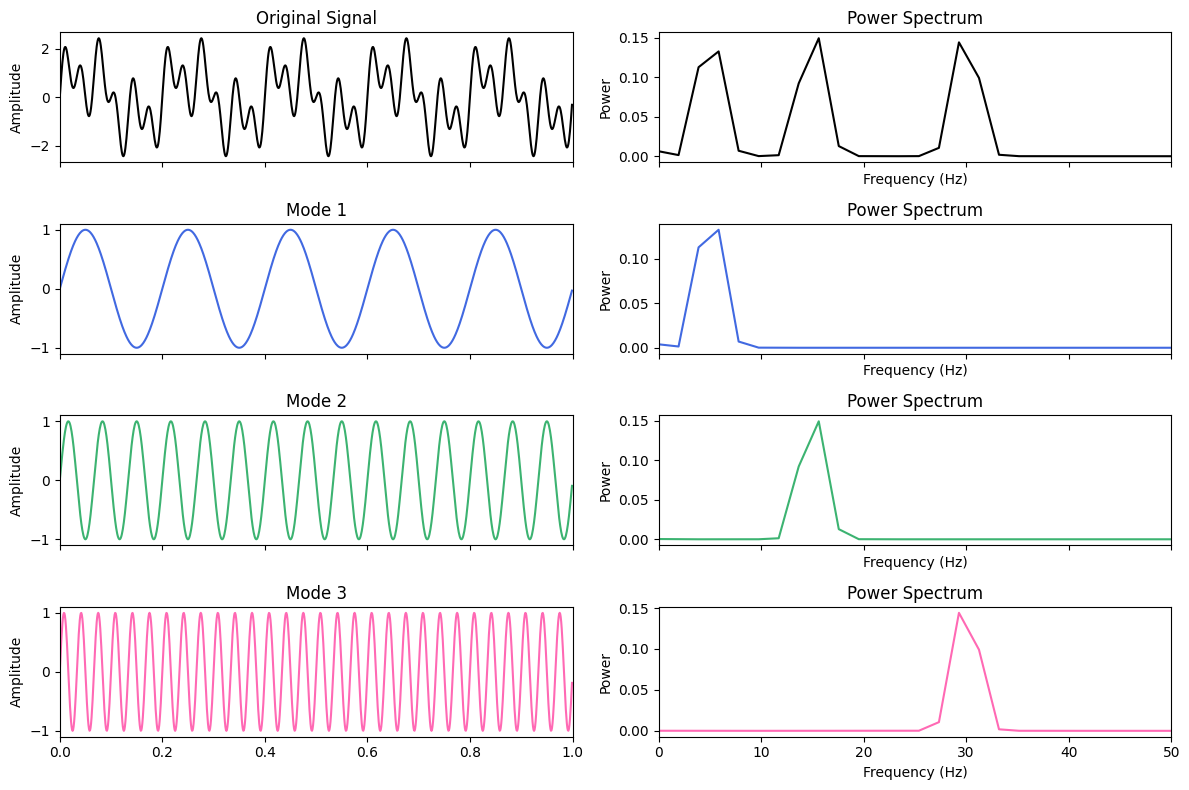

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

# === Example signal and modes (replace with real data) ===
fs = 1000  # Sampling frequency
t = np.linspace(0, 1, fs, endpoint=False)

# Original signal = 3 frequency components
signal = np.sin(2 * np.pi * 5 * t) + np.sin(2 * np.pi * 15 * t) + np.sin(2 * np.pi * 30 * t)

# Modes: ideally extracted by VMD, EMD, etc.
mode1 = np.sin(2 * np.pi * 5 * t)
mode2 = np.sin(2 * np.pi * 15 * t)
mode3 = np.sin(2 * np.pi * 30 * t)

signals = [signal, mode1, mode2, mode3]
titles = ["Original Signal", "Mode 1", "Mode 2", "Mode 3"]
colors = ["black", "royalblue", "mediumseagreen", "hotpink"]

# === Create stacked figure with time series + spectrum ===
fig, axs = plt.subplots(len(signals), 2, figsize=(12, 8), sharex="col")

for i, sig in enumerate(signals):
    # Left: time series
    axs[i, 0].plot(t, sig, color=colors[i])
    axs[i, 0].set_ylabel("Amplitude")
    axs[i, 0].set_title(titles[i])
    axs[i, 0].set_xlim(0, 1)

    # Right: Power Spectrum (Welch)
    freqs, psd = welch(sig, fs=fs, nperseg=512)
    axs[i, 1].plot(freqs, psd, color=colors[i])
    axs[i, 1].set_xlim(0, 50)
    axs[i, 1].set_xlabel("Frequency (Hz)")
    axs[i, 1].set_ylabel("Power")
    axs[i, 1].set_title("Power Spectrum")

plt.tight_layout()
plt.show()


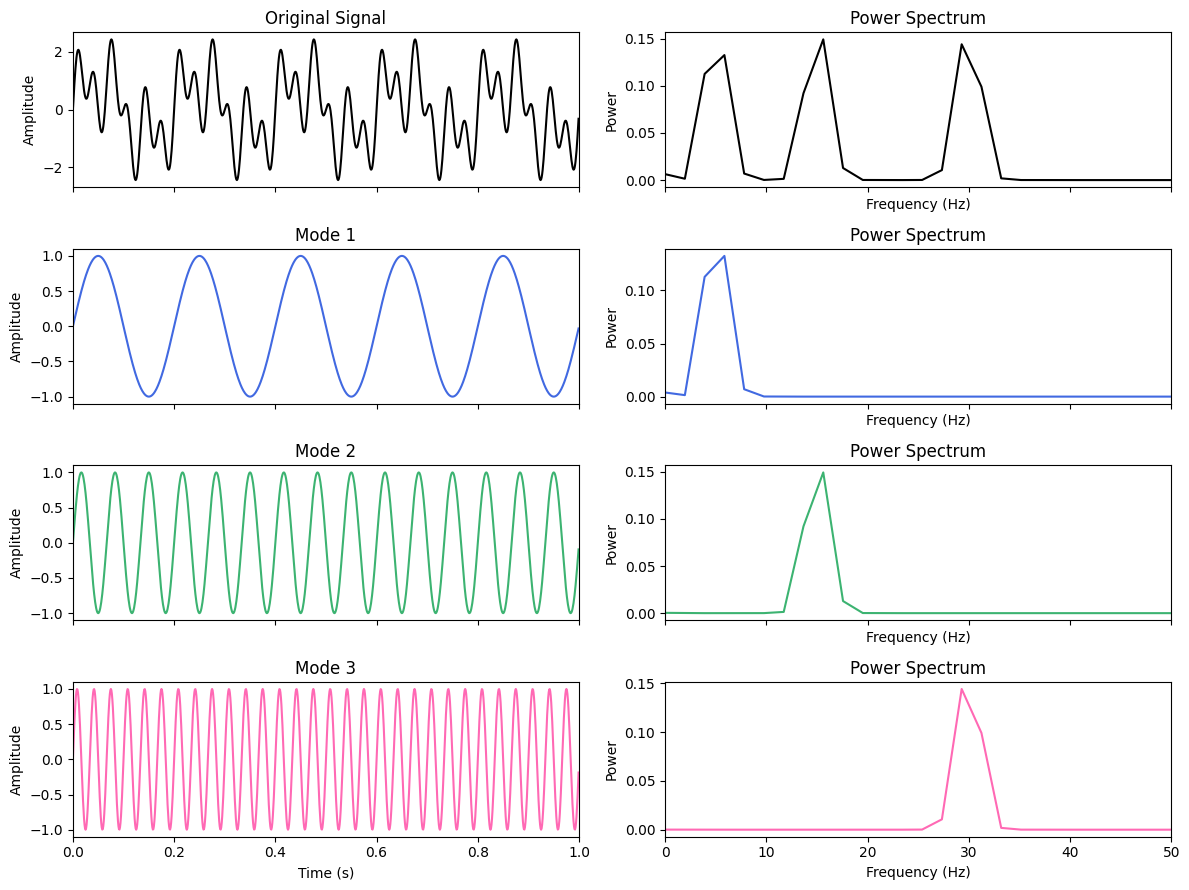

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

# === Simulated data (replace with real signals and modes) ===
fs = 1000
t = np.linspace(0, 1, fs, endpoint=False)

signal = np.sin(2 * np.pi * 5 * t) + np.sin(2 * np.pi * 15 * t) + np.sin(2 * np.pi * 30 * t)
mode1 = np.sin(2 * np.pi * 5 * t)
mode2 = np.sin(2 * np.pi * 15 * t)
mode3 = np.sin(2 * np.pi * 30 * t)

signals = [signal, mode1, mode2, mode3]
titles = ["Original Signal", "Mode 1", "Mode 2", "Mode 3"]
colors = ["black", "royalblue", "mediumseagreen", "hotpink"]

# === Full stacked figure (time series + spectrum) ===
fig, axs = plt.subplots(4, 2, figsize=(12, 9), sharex="col")

for i, sig in enumerate(signals):
    axs[i, 0].plot(t, sig, color=colors[i])
    axs[i, 0].set_ylabel("Amplitude")
    axs[i, 0].set_title(titles[i])
    axs[i, 0].set_xlim(0, 1)
    if i == 3:
        axs[i, 0].set_xlabel("Time (s)")

    freqs, psd = welch(sig, fs=fs, nperseg=512)
    axs[i, 1].plot(freqs, psd, color=colors[i])
    axs[i, 1].set_xlim(0, 50)
    axs[i, 1].set_xlabel("Frequency (Hz)")
    axs[i, 1].set_ylabel("Power")
    axs[i, 1].set_title("Power Spectrum")

plt.tight_layout()
plt.savefig("vmd_decomposition_full.png", dpi=300)
plt.show()

# === Save each row with Time label ===
for i, sig in enumerate(signals):
    fig, axs = plt.subplots(1, 2, figsize=(12, 2.5))

    axs[0].plot(t, sig, color=colors[i])
    axs[0].set_xlim(0, 1)
    axs[0].set_ylabel("Amplitude")
    axs[0].set_title(titles[i])
    axs[0].set_xlabel("Time (s)")

    freqs, psd = welch(sig, fs=fs, nperseg=512)
    axs[1].plot(freqs, psd, color=colors[i])
    axs[1].set_xlim(0, 50)
    axs[1].set_xlabel("Frequency (Hz)")
    axs[1].set_ylabel("Power")
    axs[1].set_title("Power Spectrum")

    plt.tight_layout()
    plt.savefig(f"vmd_row_{i}.png", dpi=300)
    plt.close()


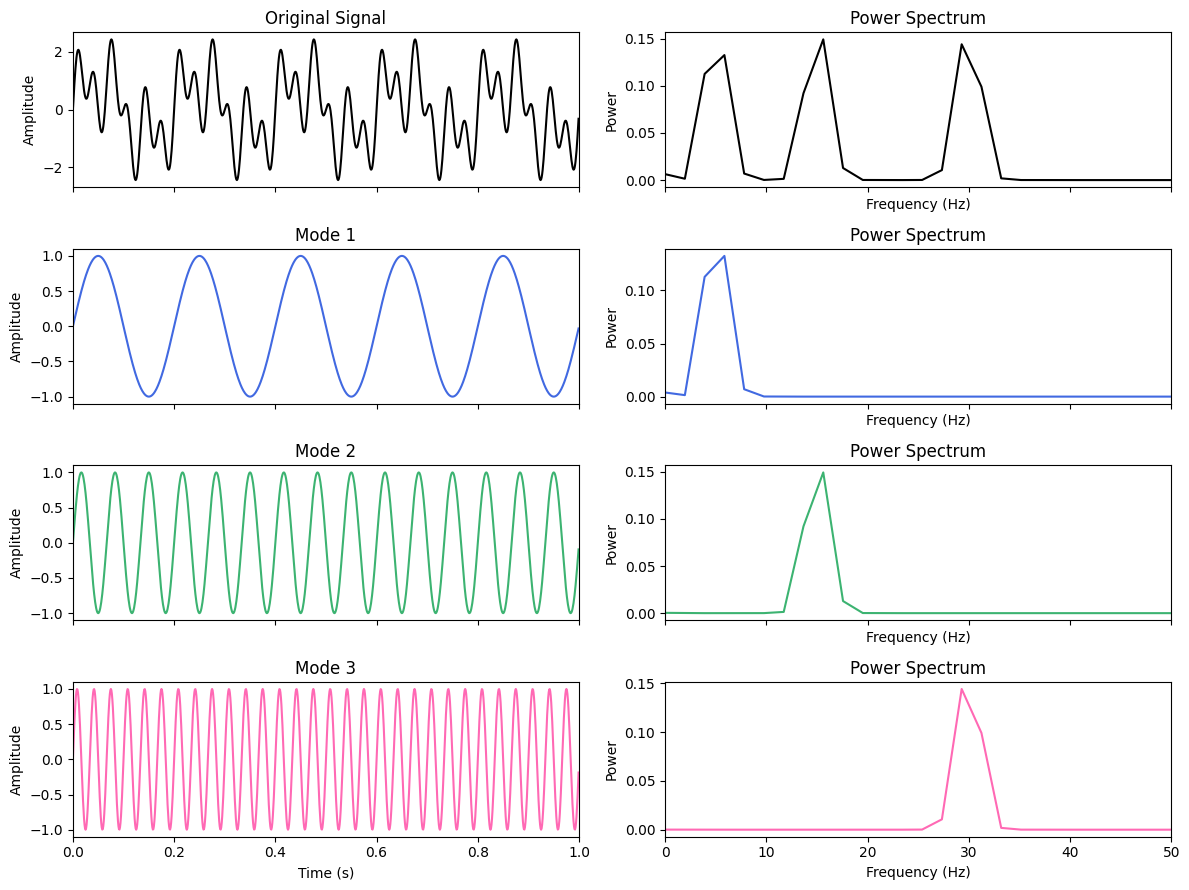

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

# === Simulated data (replace with real signals and modes) ===
fs = 1000  # Sampling frequency (Hz)
t = np.linspace(0, 1, fs, endpoint=False)

# Construct signal and its modes
signal = np.sin(2 * np.pi * 5 * t) + np.sin(2 * np.pi * 15 * t) + np.sin(2 * np.pi * 30 * t)
mode1 = np.sin(2 * np.pi * 5 * t)
mode2 = np.sin(2 * np.pi * 15 * t)
mode3 = np.sin(2 * np.pi * 30 * t)

signals = [signal, mode1, mode2, mode3]
titles = ["Original Signal", "Mode 1", "Mode 2", "Mode 3"]
colors = ["black", "royalblue", "mediumseagreen", "hotpink"]

# === Save full stacked figure (for overview) ===
fig, axs = plt.subplots(4, 2, figsize=(12, 9), sharex="col")

for i, sig in enumerate(signals):
    # Time domain
    axs[i, 0].plot(t, sig, color=colors[i])
    axs[i, 0].set_ylabel("Amplitude")
    axs[i, 0].set_title(titles[i])
    axs[i, 0].set_xlim(0, 1)
    if i == 3:
        axs[i, 0].set_xlabel("Time (s)")

    # Frequency domain
    freqs, psd = welch(sig, fs=fs, nperseg=512)
    axs[i, 1].plot(freqs, psd, color=colors[i])
    axs[i, 1].set_xlim(0, 50)
    axs[i, 1].set_xlabel("Frequency (Hz)")
    axs[i, 1].set_ylabel("Power")
    axs[i, 1].set_title("Power Spectrum")

plt.tight_layout()
plt.savefig("vmd_decomposition_full.png", dpi=300)
plt.show()

# === Save each line separately for Beamer slide stacking ===
for i, sig in enumerate(signals):
    fig, axs = plt.subplots(1, 2, figsize=(12, 2.5))

    # Time domain
    axs[0].plot(t, sig, color=colors[i])
    axs[0].set_xlim(0, 1)
    axs[0].set_ylabel("Amplitude")
    axs[0].set_title(titles[i])
    axs[0].set_xlabel("Time (s)")

    # Frequency domain
    freqs, psd = welch(sig, fs=fs, nperseg=512)
    axs[1].plot(freqs, psd, color=colors[i])
    axs[1].set_xlim(0, 50)
    axs[1].set_xlabel("Frequency (Hz)")
    axs[1].set_ylabel("Power")
    axs[1].set_title("Power Spectrum")

    # Save figure
    plt.tight_layout()
    plt.savefig(f"vmd_row_{i}.png", dpi=300)
    plt.close()


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

fs = 1000
t = np.linspace(0, 1, fs, endpoint=False)

signal = np.sin(2 * np.pi * 5 * t) + np.sin(2 * np.pi * 15 * t) + np.sin(2 * np.pi * 30 * t)
mode1 = np.sin(2 * np.pi * 5 * t)
mode2 = np.sin(2 * np.pi * 15 * t)
mode3 = np.sin(2 * np.pi * 30 * t)

signals = [signal, mode1, mode2, mode3]
titles = ["Original Signal", "Mode 1", "Mode 2", "Mode 3"]
colors = ["black", "royalblue", "mediumseagreen", "hotpink"]

# Generate stacked figures progressively
for frame in range(1, 5):  # Number of rows to show (1 to 4)
    fig, axs = plt.subplots(frame, 2, figsize=(12, 2.5 * frame), sharex="col")
    if frame == 1:
        axs = np.array([axs])  # make 2D

    for i in range(frame):
        sig = signals[i]
        axs[i, 0].plot(t, sig, color=colors[i])
        axs[i, 0].set_xlim(0, 1)
        axs[i, 0].set_ylabel("Amplitude")
        axs[i, 0].set_title(titles[i])
        axs[i, 0].set_xlabel("Time (s)")

        freqs, psd = welch(sig, fs=fs, nperseg=512)
        axs[i, 1].plot(freqs, psd, color=colors[i])
        axs[i, 1].set_xlim(0, 50)
        axs[i, 1].set_xlabel("Frequency (Hz)")
        axs[i, 1].set_ylabel("Power")
        axs[i, 1].set_title("Power Spectrum")

    plt.tight_layout()
    plt.savefig(f"vmd_stack_{frame - 1}.png", dpi=300)
    plt.close()


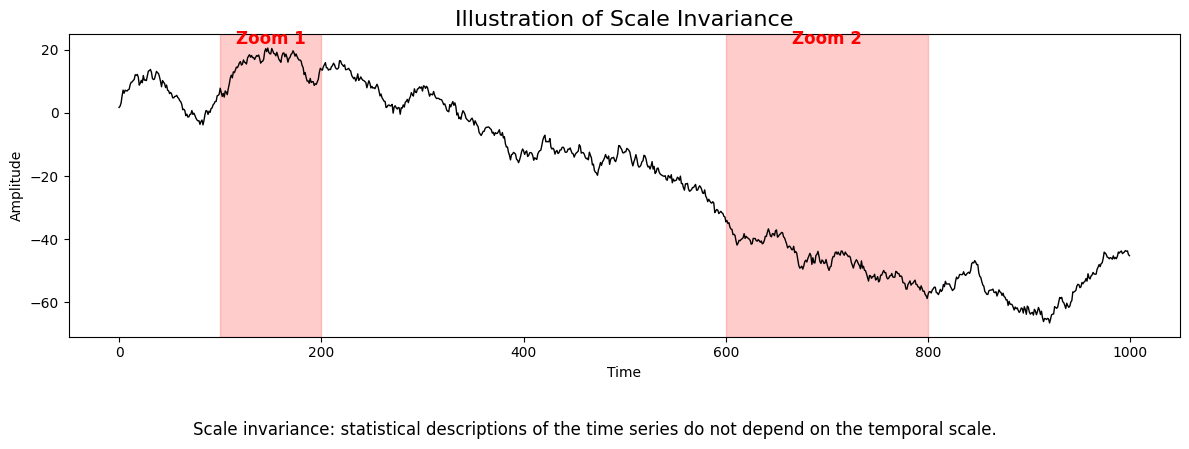

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Generate scale-invariant-like signal (e.g., fractional Gaussian noise-like)
np.random.seed(0)
N = 1000
signal = np.cumsum(np.random.randn(N))  # random walk is a self-similar process

# Define zoom windows
zoom1 = (100, 200)
zoom2 = (600, 800)

# Plot full signal with zoom boxes
plt.figure(figsize=(12, 4))
plt.plot(signal, color='black', linewidth=1)
plt.title("Illustration of Scale Invariance", fontsize=16)

# Draw red rectangles to indicate zooms
for (start, end), label in zip([zoom1, zoom2], ['Zoom 1', 'Zoom 2']):
    plt.axvspan(start, end, color='red', alpha=0.2)
    mid = (start + end) // 2
    plt.text(mid, max(signal), label, color='red', ha='center', va='bottom', fontsize=12, weight='bold')

# Add explanation text
plt.figtext(0.5, -0.1, "Scale invariance: statistical descriptions of the time series do not depend on the temporal scale.",
            ha='center', fontsize=12)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()


In [17]:
from PIL import Image, ImageDraw

# Load base image
img = Image.open("meg_projection_cortex.png")
frames = []

# Coordinates for each cortical region (approx manually)
positions = [(300, 200), (350, 250), (450, 500)]  # example

for i, pos in enumerate(positions):
    frame = img.copy()
    draw = ImageDraw.Draw(frame)
    draw.ellipse((pos[0]-10, pos[1]-10, pos[0]+10, pos[1]+10), fill='blue')
    #draw.text((pos[0]+15, pos[1]), fill='black')
    frames.append(frame)

# Save animated GIF
frames[0].save("cortical_path.gif", save_all=True, append_images=frames[1:], duration=1000, loop=0)


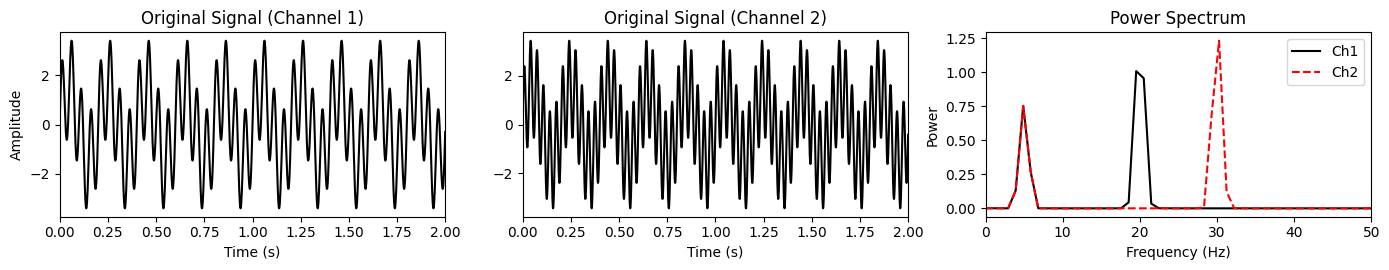

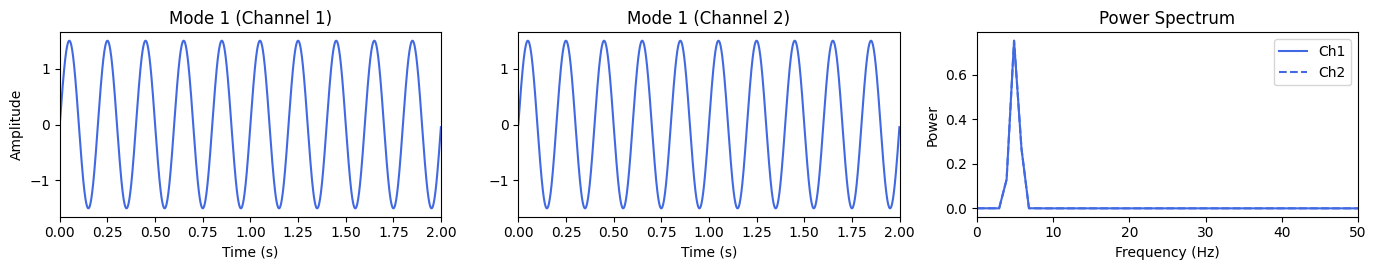

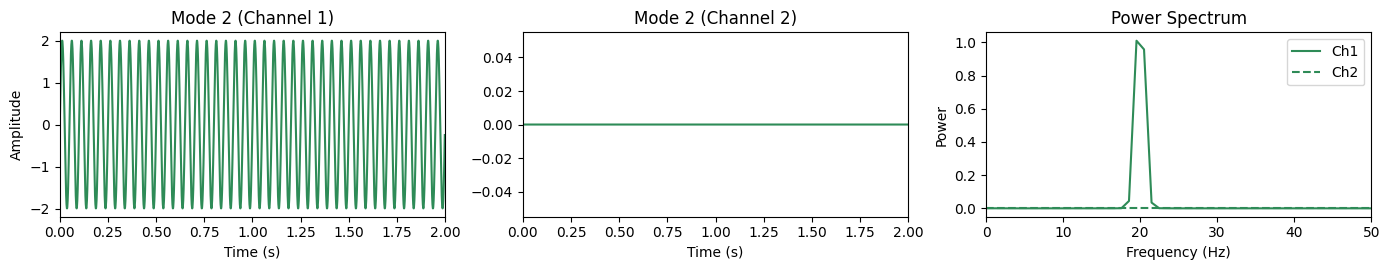

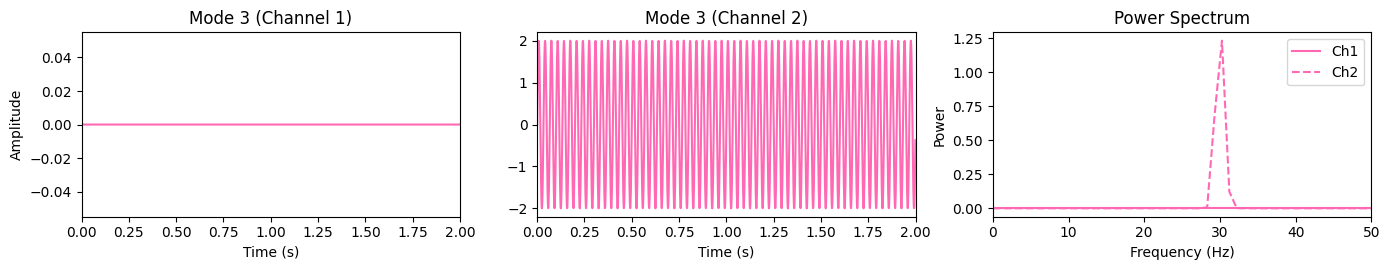

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

# === Parameters ===
fs = 1000  # Sampling frequency
duration = 2.0  # seconds
t = np.linspace(0, duration, int(fs * duration), endpoint=False)

# === Strong Modes ===
mode1_ch1 = 1.5 * np.sin(2 * np.pi * 5 * t)     # Shared 5 Hz
mode1_ch2 = 1.5 * np.sin(2 * np.pi * 5 * t)

mode2_ch1 = 2.0 * np.sin(2 * np.pi * 20 * t)    # Ch1 only
mode2_ch2 = np.zeros_like(t)

mode3_ch1 = np.zeros_like(t)
mode3_ch2 = 2.0 * np.sin(2 * np.pi * 30 * t)    # Ch2 only

# === Original signal = sum of modes ===
signal_ch1 = mode1_ch1 + mode2_ch1
signal_ch2 = mode1_ch2 + mode3_ch2

# === Pack signals ===
signals_ch1 = [signal_ch1, mode1_ch1, mode2_ch1, mode3_ch1]
signals_ch2 = [signal_ch2, mode1_ch2, mode2_ch2, mode3_ch2]
titles = ["Original Signal", "Mode 1", "Mode 2", "Mode 3"]
colors = ["black", "royalblue", "seagreen", "hotpink"]

# === Save each row individually ===
for i in range(4):
    fig, axs = plt.subplots(1, 3, figsize=(14, 2.8))

    # Time: Ch1
    axs[0].plot(t, signals_ch1[i], color=colors[i])
    axs[0].set_title(f"{titles[i]} (Channel 1)")
    axs[0].set_xlim(0, duration)
    axs[0].set_ylabel("Amplitude")
    axs[0].set_xlabel("Time (s)")

    # Time: Ch2
    axs[1].plot(t, signals_ch2[i], color=colors[i])
    axs[1].set_title(f"{titles[i]} (Channel 2)")
    axs[1].set_xlim(0, duration)
    axs[1].set_xlabel("Time (s)")

    # Spectrum
    freqs1, psd1 = welch(signals_ch1[i], fs=fs, nperseg=1024)
    freqs2, psd2 = welch(signals_ch2[i], fs=fs, nperseg=1024)

    axs[2].plot(freqs1, psd1, color=colors[i], label="Ch1")
    if i == 0:
        axs[2].plot(freqs2, psd2, color="red", linestyle='--', label="Ch2")
    else:
        axs[2].plot(freqs2, psd2, color=colors[i], linestyle='--', label="Ch2")

    axs[2].set_xlim(0, 50)
    axs[2].set_title("Power Spectrum")
    axs[2].legend()
    axs[2].set_xlabel("Frequency (Hz)")
    axs[2].set_ylabel("Power")

    plt.tight_layout()
    plt.savefig(f"mvmd_row_{i}.png", dpi=300)
